### Using the VGG16 Network to Train a Deep Learning Network to Identify Images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1 Import the libraries:

In [2]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

#### 2 Initiate the model:

In [3]:
classifier = VGG16()
print(classifier.summary())

553476096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

#### 3 Load the image.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  import sys


7.1.2


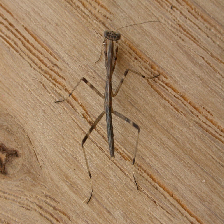

In [4]:
import os

#!pip install -U pillow
#
# import PIL
import PIL
print(PIL.PILLOW_VERSION)
# this should print 8.3.2 If it doesn't, then restart your runtime:
# Menu > Runtime > Restart Runtime

mypath='drive/MyDrive/Courses/MagniMind/Mentorship Program/DL-MentorProgram/DL_Mentor_Week2/Class 2/Week2-Class2-St'
pathimage1=os.path.join(mypath, 'Prediction/')

new_image= image.load_img(pathimage1+'stick_insect.jpg', target_size=(224, 224))

new_image

In [5]:
new_image.size

(224, 224)

#### 4 Change the image to an array by using the img_to_array function
Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.

In [6]:
transformed_image = image.img_to_array(new_image)

transformed_image.shape

(224, 224, 3)

#### 5 Change the image into four-dimensional form

The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.


In [7]:
# reshape data for the model
transformed_image = transformed_image.reshape((1, transformed_image.shape[0], transformed_image.shape[1], transformed_image.shape[2]))

You an also do the same thing as follows:

In [8]:
#transformed_image = np.expand_dims(transformed_image, axis=0)

transformed_image.shape

(1, 224, 224, 3)

In [9]:
transformed_image

array([[[[167., 133.,  96.],
         [175., 141., 106.],
         [180., 149., 120.],
         ...,
         [164., 138., 111.],
         [158., 133., 102.],
         [155., 131.,  97.]],

        [[184., 150., 113.],
         [173., 139., 104.],
         [178., 148., 112.],
         ...,
         [153., 128.,  97.],
         [156., 131., 101.],
         [163., 137., 110.]],

        [[189., 154., 114.],
         [181., 145., 113.],
         [170., 135., 103.],
         ...,
         [153., 126.,  97.],
         [154., 128.,  95.],
         [165., 139., 104.]],

        ...,

        [[157., 124.,  83.],
         [150., 114.,  90.],
         [154., 122.,  99.],
         ...,
         [156., 129., 102.],
         [145., 117.,  93.],
         [134., 105.,  91.]],

        [[158., 125.,  92.],
         [143., 116.,  87.],
         [141., 111.,  85.],
         ...,
         [143., 116.,  89.],
         [167., 141., 116.],
         [136., 108.,  86.]],

        [[188., 153., 121.],
       

#### 6 Preprocess the image
Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Specifically, from the original paper:

`The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.
Preprocess the image using the preprocess_input function`

In [10]:
transformed_image = preprocess_input(transformed_image)

transformed_image

array([[[[-7.9390030e+00,  1.6221001e+01,  4.3320000e+01],
         [ 2.0609970e+00,  2.4221001e+01,  5.1320000e+01],
         [ 1.6060997e+01,  3.2221001e+01,  5.6320000e+01],
         ...,
         [ 7.0609970e+00,  2.1221001e+01,  4.0320000e+01],
         [-1.9390030e+00,  1.6221001e+01,  3.4320000e+01],
         [-6.9390030e+00,  1.4221001e+01,  3.1320000e+01]],

        [[ 9.0609970e+00,  3.3221001e+01,  6.0320000e+01],
         [ 6.0997009e-02,  2.2221001e+01,  4.9320000e+01],
         [ 8.0609970e+00,  3.1221001e+01,  5.4320000e+01],
         ...,
         [-6.9390030e+00,  1.1221001e+01,  2.9320000e+01],
         [-2.9390030e+00,  1.4221001e+01,  3.2320000e+01],
         [ 6.0609970e+00,  2.0221001e+01,  3.9320000e+01]],

        [[ 1.0060997e+01,  3.7221001e+01,  6.5320000e+01],
         [ 9.0609970e+00,  2.8221001e+01,  5.7320000e+01],
         [-9.3900299e-01,  1.8221001e+01,  4.6320000e+01],
         ...,
         [-6.9390030e+00,  9.2210007e+00,  2.9320000e+01],
         [

#### 7 Create the `predictor` variable:
We can call the `predict()` function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [11]:
y_pred = classifier.predict(transformed_image)

y_pred

array([[4.21830066e-07, 1.85480485e-06, 1.72294108e-06, 6.76564582e-07,
        2.89053787e-05, 1.41853125e-05, 1.71890460e-05, 2.24749442e-06,
        3.92589527e-06, 3.78674349e-06, 2.06268342e-05, 7.51030484e-06,
        1.40643479e-05, 3.43732900e-05, 1.98462840e-05, 8.18991157e-06,
        1.08288232e-05, 1.76717949e-05, 1.64576668e-05, 3.33322605e-05,
        2.74088525e-05, 3.04659261e-06, 5.54779490e-06, 4.73525370e-06,
        3.29870454e-06, 1.77044116e-04, 1.83029595e-04, 5.83823654e-04,
        5.24099858e-04, 1.54459792e-06, 5.06804681e-05, 1.18027834e-04,
        2.67617899e-04, 1.81688829e-05, 3.93874507e-05, 4.16620678e-05,
        1.94424792e-05, 3.64137195e-05, 4.32395784e-04, 1.50895476e-05,
        6.48876419e-04, 8.92810291e-04, 4.67032223e-04, 1.95193570e-05,
        1.00129517e-03, 1.36421746e-04, 4.56671783e-04, 4.72387146e-05,
        5.16185082e-06, 2.23003972e-05, 1.38761889e-05, 3.23492327e-06,
        3.17189289e-04, 1.60120457e-04, 1.34436341e-04, 1.187295

#### 8 Check the shape of the image. 
It should be (1,1000). It's 1000 because the ImageNet database has 1000 categories of images. The predictor variable shows the probability of our image being one of those images:


In [12]:
y_pred.shape

(1, 1000)

#### 9 Print the top five probabilities of what our image is
Use the `decode_predictions` function and pass the function of the predictor variable, `y_pred`, and the number of predictions and corresponding labels to output:

In [13]:
from keras.applications.vgg16 import decode_predictions

decode_predictions(y_pred,top=5)

49152/35363 [=========================================] - 0s 0us/step


[[('n02231487', 'walking_stick', 0.3052452),
  ('n01775062', 'wolf_spider', 0.26035678),
  ('n03804744', 'nail', 0.14323169),
  ('n01770081', 'harvestman', 0.06665225),
  ('n01773549', 'barn_spider', 0.036702957)]]

#### 2.10 Put the predictions in a human-readable form. 
Print the most probable label from the output from the result of the `decode_predictions` function:


In [14]:
label = decode_predictions(y_pred)

# Most likely result is retrieved, for example, the highest probability

decoded_label = label[0][0]

# The classification is printed

print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

walking_stick (30.52%)
